#### Creating the Classification Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clustered_df = pd.read_csv('output/clustered_data.csv')
X_full = clustered_df.drop(columns=['Cluster'])
y = clustered_df['Cluster']

In [5]:
print(clustered_df.shape)
print(X_full.shape)
print(y.shape)

(4618, 44)
(4618, 43)
(4618,)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:31:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.65}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       156
           1       0.97      0.95      0.96       150
           2       0.99      0.94      0.96       251
           3       0.95      0.98      0.96       212
           4       0.94      0.95      0.95       155

    accuracy                           0.95       924
   macro avg       0.95      0.95      0.95       924
weighted avg       0.95      0.95      0.95       924



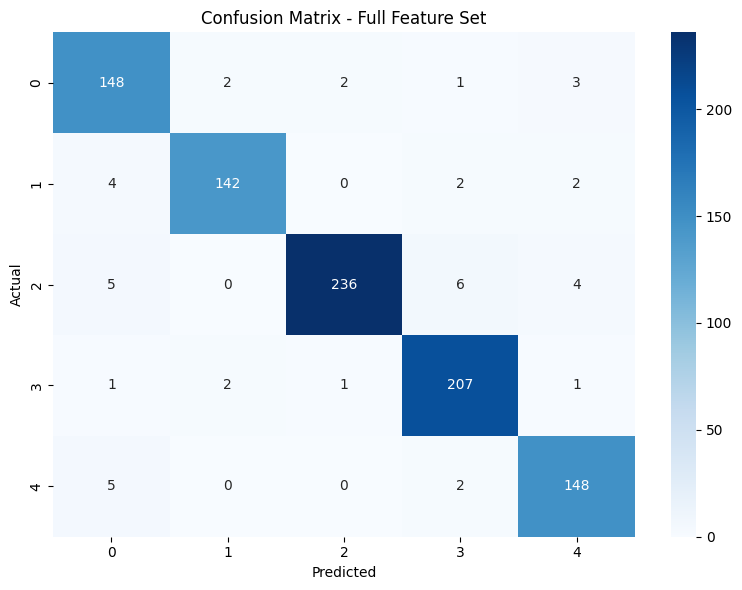


Top 28 features saved to: output/top_28_features_classification.pkl
Top 28 feature dataset saved to: output/top_28_features.csv


In [ ]:
import pandas as pd
import xgboost as xgb
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, stratify=y, random_state=42
)

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

param_grid = {
    'n_estimators': [300,400],
    'max_depth': [1,2, 3, 5, 7],
    'learning_rate': [0.1, 0.05],
    'subsample': [0.55,0.6,0.65],
    'colsample_bytree': [1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Full Feature Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

feature_importances = pd.Series(
    grid_search.best_estimator_.feature_importances_,
    index=X_full.columns
).sort_values(ascending=False)

os.makedirs("output", exist_ok=True)
feature_importances.to_csv("output/feature_importances_full.csv")

top_n = 28  
top_features = feature_importances.head(top_n).index.tolist()

joblib.dump(top_features, 'output/top_28_features_classification.pkl')

top_n_df = clustered_df[top_features + ['Cluster']]
top_n_df.to_csv(f"output/top_{top_n}_features.csv", index=False)

print(f"\nTop {top_n} features saved to: output/top_28_features_classification.pkl")
print(f"Top {top_n} feature dataset saved to: output/top_{top_n}_features.csv")


In [3]:
best_model=grid_search.best_estimator_
print(best_model.get_params())

{'objective': 'multi:softmax', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'mlogloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 2, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.65, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'num_class': 5, 'use_label_encoder': False}


<Figure size 1200x800 with 0 Axes>

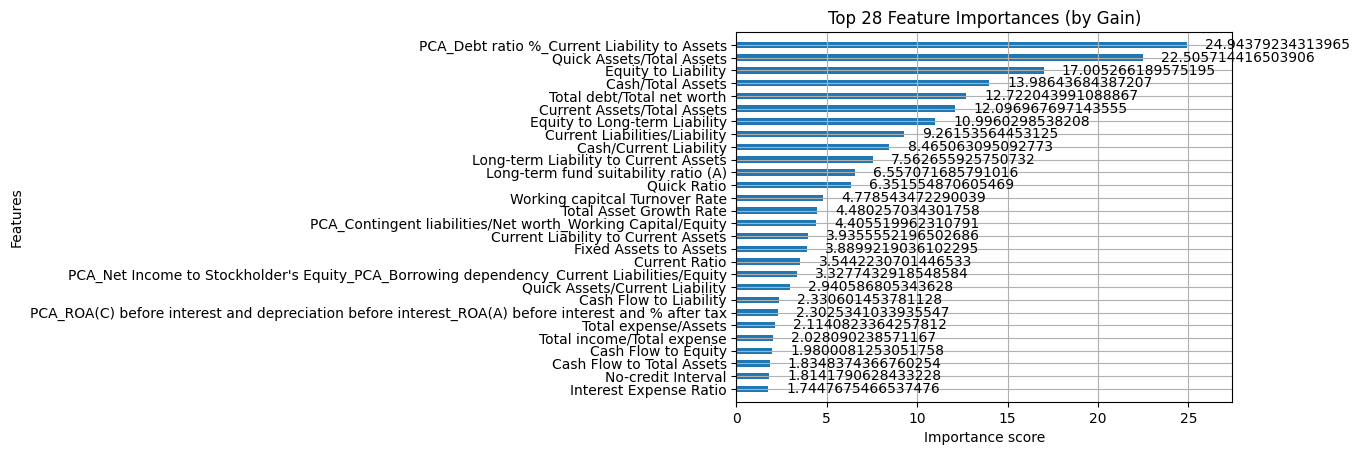

In [4]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Access the trained model
best_model = grid_search.best_estimator_

# Plot top N feature importances by gain
plt.figure(figsize=(12, 8))
xgb.plot_importance(
    best_model,
    importance_type='gain',  # or 'weight', 'cover', 'total_gain'
    max_num_features=top_n,
    height=0.5
)
plt.title(f'Top {top_n} Feature Importances (by Gain)')
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:34:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters (Reduced): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       156
           1       0.99      0.92      0.95       150
           2       0.98      0.95      0.97       251
           3       0.95      0.98      0.96       212
           4       0.94      0.94      0.94       155

    accuracy                           0.95       924
   macro avg       0.95      0.95      0.95       924
weighted avg       0.95      0.95      0.95       924



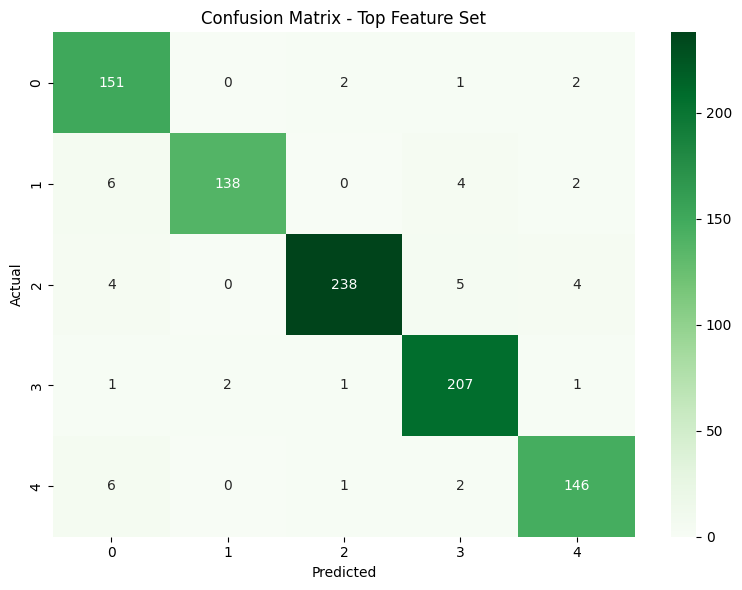


Cross-Validation Results:
Mean Accuracy: 0.9502 ± 0.0048
Mean Precision (Macro): 0.9489 ± 0.0048
Mean Recall (Macro): 0.9479 ± 0.0042
Mean F1-score (Macro): 0.9482 ± 0.0043

✅ Full dataframe with predictions saved to: output/top_28_features_with_predictions.csv
Saved predicted cluster 0 to output/predicted_cluster_0.csv
Saved predicted cluster 1 to output/predicted_cluster_1.csv
Saved predicted cluster 2 to output/predicted_cluster_2.csv
Saved predicted cluster 3 to output/predicted_cluster_3.csv
Saved predicted cluster 4 to output/predicted_cluster_4.csv


In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Parameters
top_n = 28  # Set your desired number of features

# Ensure output directory exists
os.makedirs("output", exist_ok=True)

# Load reduced feature set
reduced_df = pd.read_csv(f"output/top_{top_n}_features.csv", index_col=0)
X_reduced = reduced_df.drop(columns=['Cluster'])
y = reduced_df['Cluster']

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)

# Model
xgb_reduced = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(y.unique()),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search_r = GridSearchCV(xgb_reduced, param_grid, scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
grid_search_r.fit(X_train_r, y_train_r)

# Evaluation
y_pred_r_test = grid_search_r.best_estimator_.predict(X_test_r)
print("Best Parameters (Reduced):", grid_search_r.best_params_)
print(classification_report(y_test_r, y_pred_r_test))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_r, y_pred_r_test), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Top Feature Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Cross-validation performance
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results_r = cross_validate(
    grid_search_r.best_estimator_, X_reduced, y,
    cv=cv, scoring=scoring, n_jobs=-1
)

print("\nCross-Validation Results:")
print(f"Mean Accuracy: {cv_results_r['test_accuracy'].mean():.4f} ± {cv_results_r['test_accuracy'].std():.4f}")
print(f"Mean Precision (Macro): {cv_results_r['test_precision_macro'].mean():.4f} ± {cv_results_r['test_precision_macro'].std():.4f}")
print(f"Mean Recall (Macro): {cv_results_r['test_recall_macro'].mean():.4f} ± {cv_results_r['test_recall_macro'].std():.4f}")
print(f"Mean F1-score (Macro): {cv_results_r['test_f1_macro'].mean():.4f} ± {cv_results_r['test_f1_macro'].std():.4f}")

# Predict on entire dataset to get predictions for all rows
y_pred_all = grid_search_r.best_estimator_.predict(X_reduced)

# Append predictions to DataFrame
reduced_df['Predicted_Cluster'] = y_pred_all

# Save full DataFrame with predictions
output_full_path = f"output/top_{top_n}_features_with_predictions.csv"
reduced_df.to_csv(output_full_path)
print(f"\n✅ Full dataframe with predictions saved to: {output_full_path}")

# Split and save by predicted clusters
index_bankruptcy_mapping = pd.read_csv('index_and_bankrupt.csv')

reduced_df = reduced_df.reset_index(drop=True)
index_bankruptcy_mapping = index_bankruptcy_mapping.reset_index(drop=True)

# Append Index to reduced_df for mapping
reduced_df['Index'] = index_bankruptcy_mapping['Index']

# Merge bankruptcy values into reduced_df using Index as the key
reduced_df = reduced_df.merge(index_bankruptcy_mapping, on='Index', how='left')

# Iterate and export
for cluster_label, group in reduced_df.groupby('Predicted_Cluster'):
    path = f"output/predicted_cluster_{int(cluster_label)}.csv"
    group.drop(columns=['Cluster', 'Predicted_Cluster']).to_csv(path, index=False)
    print(f"Saved predicted cluster {int(cluster_label)} to {path}")



In [6]:
import joblib

# Save the best model
model_path = f"output/xgb_top_{top_n}_features_model.joblib"
joblib.dump(grid_search_r.best_estimator_, model_path)
print(f"\n💾 Trained XGBoost model saved to: {model_path}")


💾 Trained XGBoost model saved to: output/xgb_top_28_features_model.joblib
